In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
train_data = x_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17772,-121.85,37.36,15.0,3148.0,1116.0,3556.0,1037.0,3.0466,<1H OCEAN,159600.0
10147,-117.92,33.91,33.0,2868.0,382.0,1204.0,412.0,6.1825,<1H OCEAN,336900.0
11612,-118.04,33.80,33.0,2685.0,466.0,1359.0,476.0,5.0261,<1H OCEAN,245100.0
19601,-120.98,37.57,27.0,925.0,176.0,449.0,168.0,2.6406,INLAND,129700.0
19110,-122.64,38.23,52.0,1075.0,249.0,519.0,210.0,3.0769,<1H OCEAN,230900.0
...,...,...,...,...,...,...,...,...,...,...
1934,-121.02,38.66,4.0,7392.0,1155.0,3096.0,1065.0,4.5246,INLAND,198900.0
20157,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080,<1H OCEAN,297900.0
4416,-118.26,34.08,50.0,1791.0,660.0,2183.0,675.0,1.7945,<1H OCEAN,166700.0
6614,-118.10,34.17,46.0,1774.0,315.0,753.0,330.0,4.7241,INLAND,279600.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

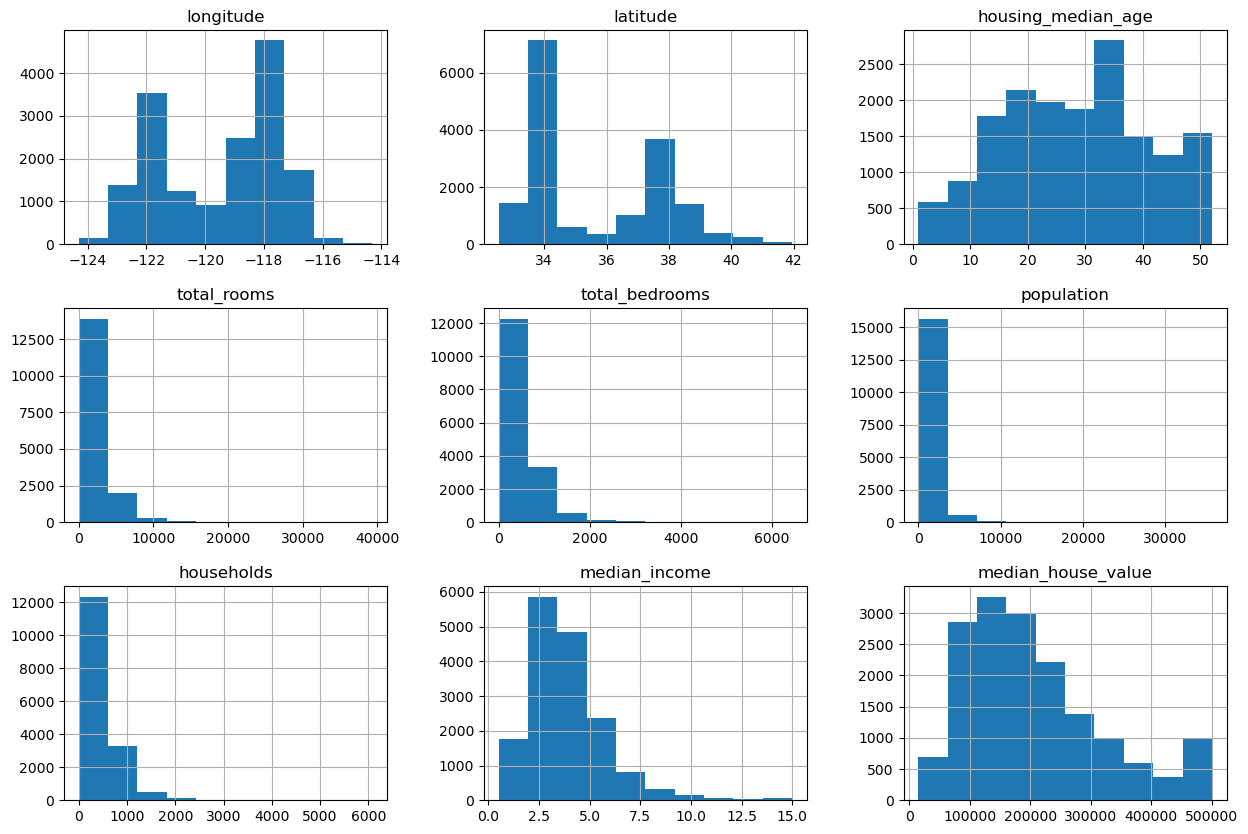

In [10]:
train_data.hist(figsize=(15, 10))

<AxesSubplot:>

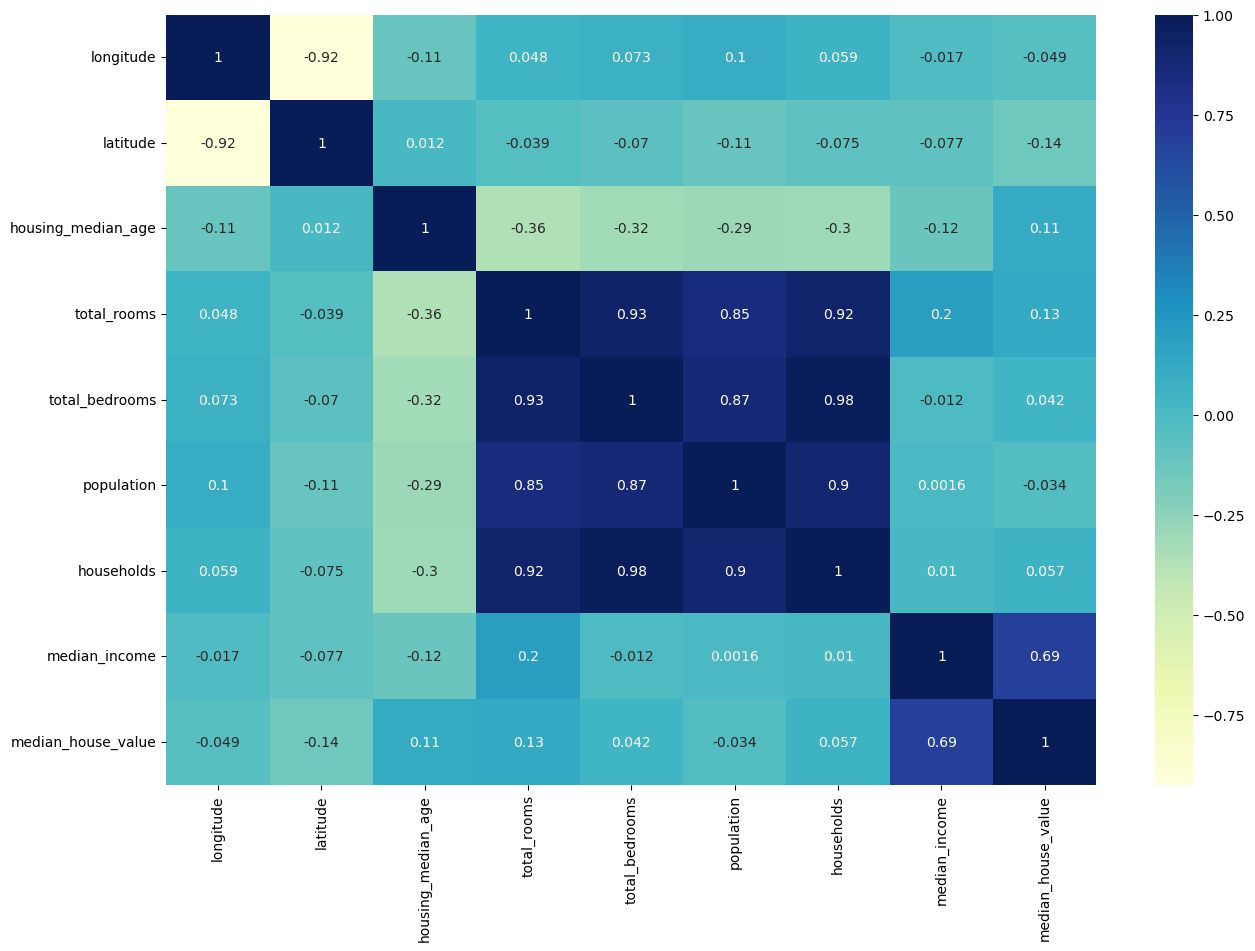

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

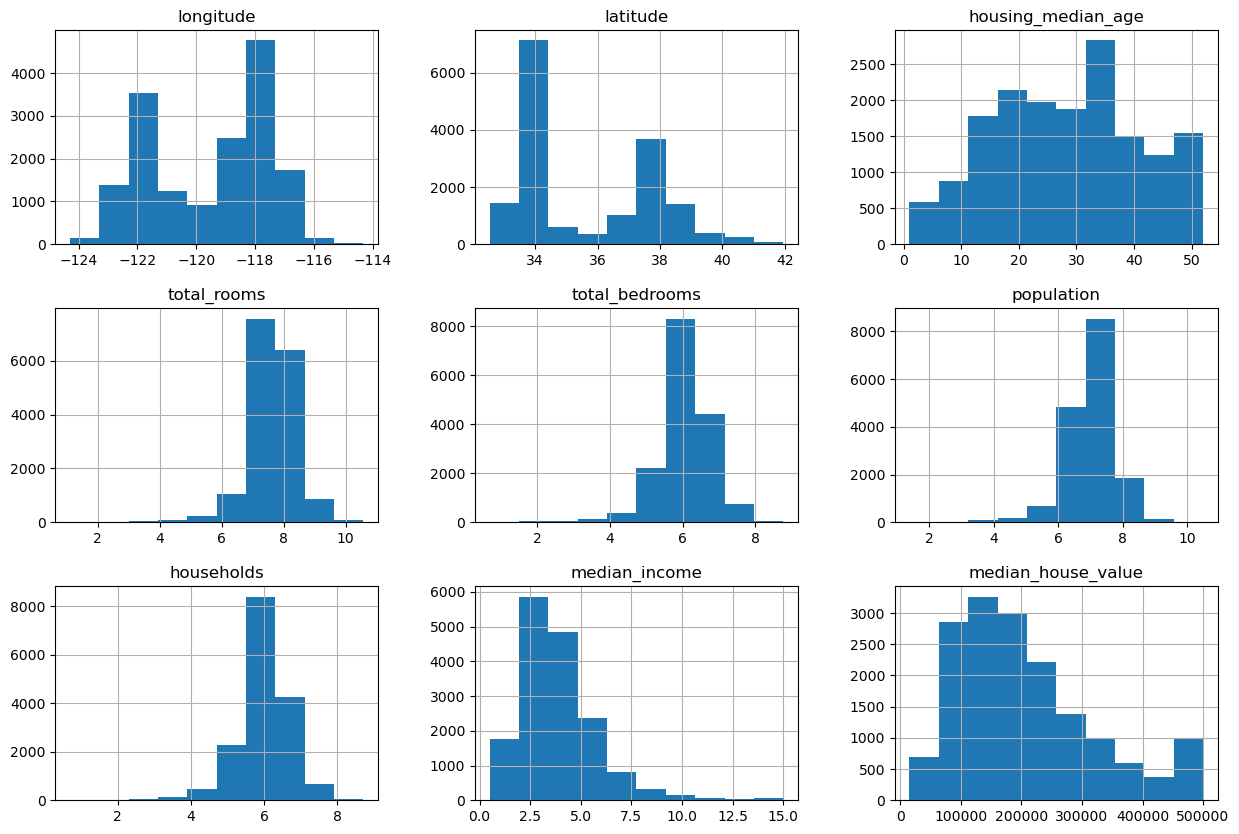

In [13]:
train_data.hist(figsize=(15,10))

In [14]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7202
INLAND        5233
NEAR OCEAN    2103
NEAR BAY      1805
ISLAND           3
Name: ocean_proximity, dtype: int64

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17772,-121.85,37.36,15.0,8.054840,7.018402,8.176673,6.945051,3.0466,159600.0,1,0,0,0,0
10147,-117.92,33.91,33.0,7.961719,5.948035,7.094235,6.023448,6.1825,336900.0,1,0,0,0,0
11612,-118.04,33.80,33.0,7.895808,6.146329,7.215240,6.167516,5.0261,245100.0,1,0,0,0,0
19601,-120.98,37.57,27.0,6.830874,5.176150,6.109248,5.129899,2.6406,129700.0,0,1,0,0,0
19110,-122.64,38.23,52.0,6.981006,5.521461,6.253829,5.351858,3.0769,230900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,-121.02,38.66,4.0,8.908289,7.052721,8.038189,6.971669,4.5246,198900.0,0,1,0,0,0
20157,-119.15,34.44,33.0,7.603898,5.973810,6.950815,5.863631,5.3080,297900.0,1,0,0,0,0
4416,-118.26,34.08,50.0,7.491088,6.493754,7.688913,6.516193,1.7945,166700.0,1,0,0,0,0
6614,-118.10,34.17,46.0,7.481556,5.755742,6.625392,5.802118,4.7241,279600.0,0,1,0,0,0


<AxesSubplot:>

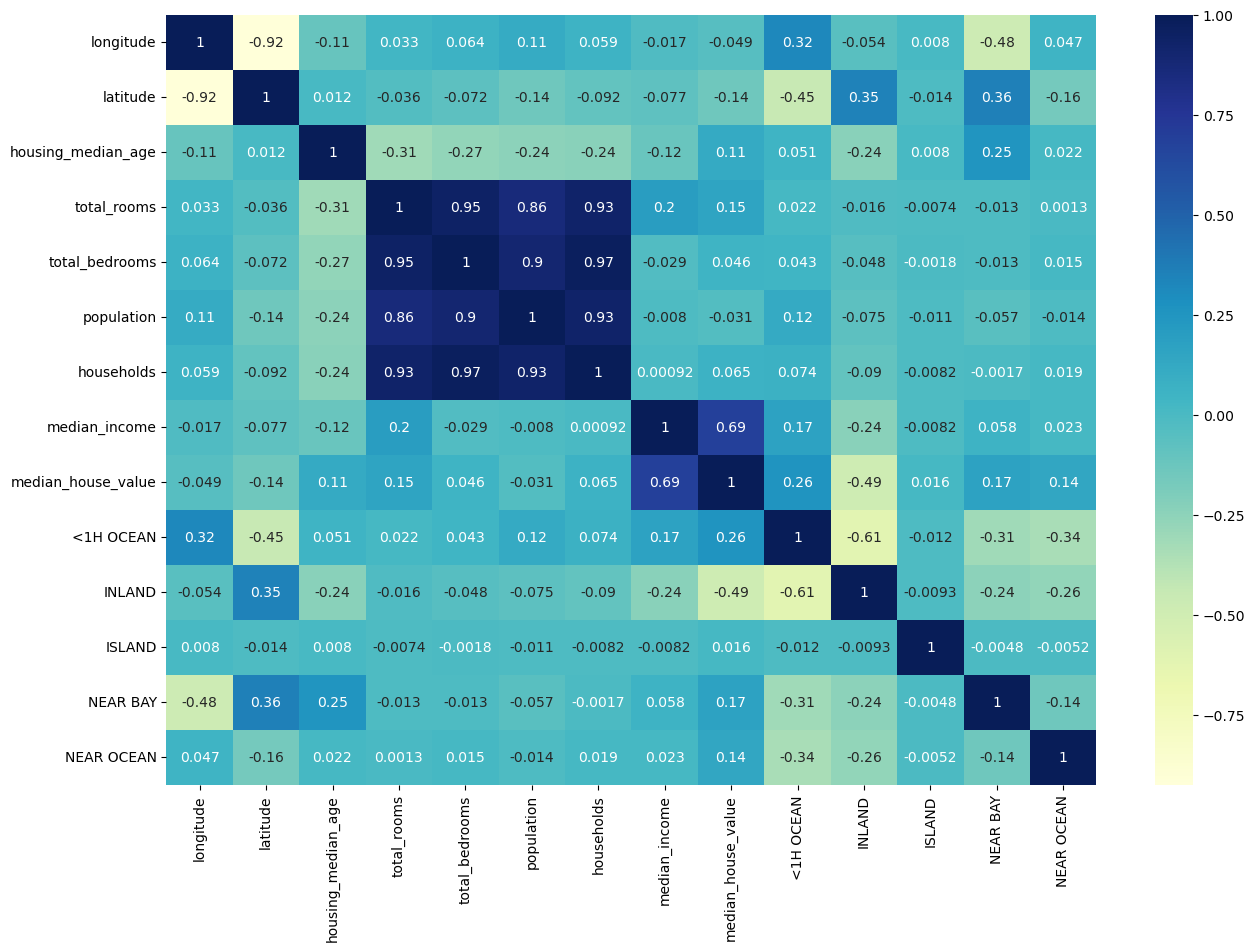

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

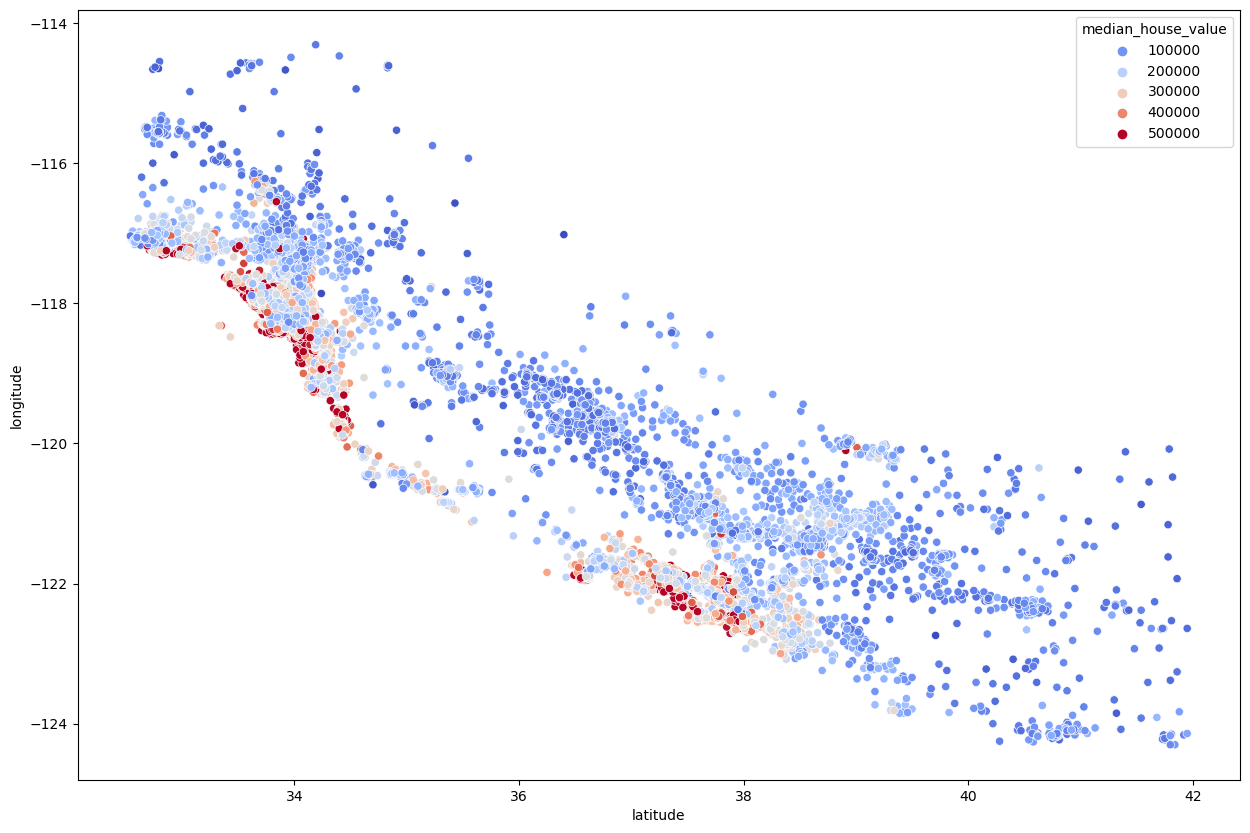

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<AxesSubplot:>

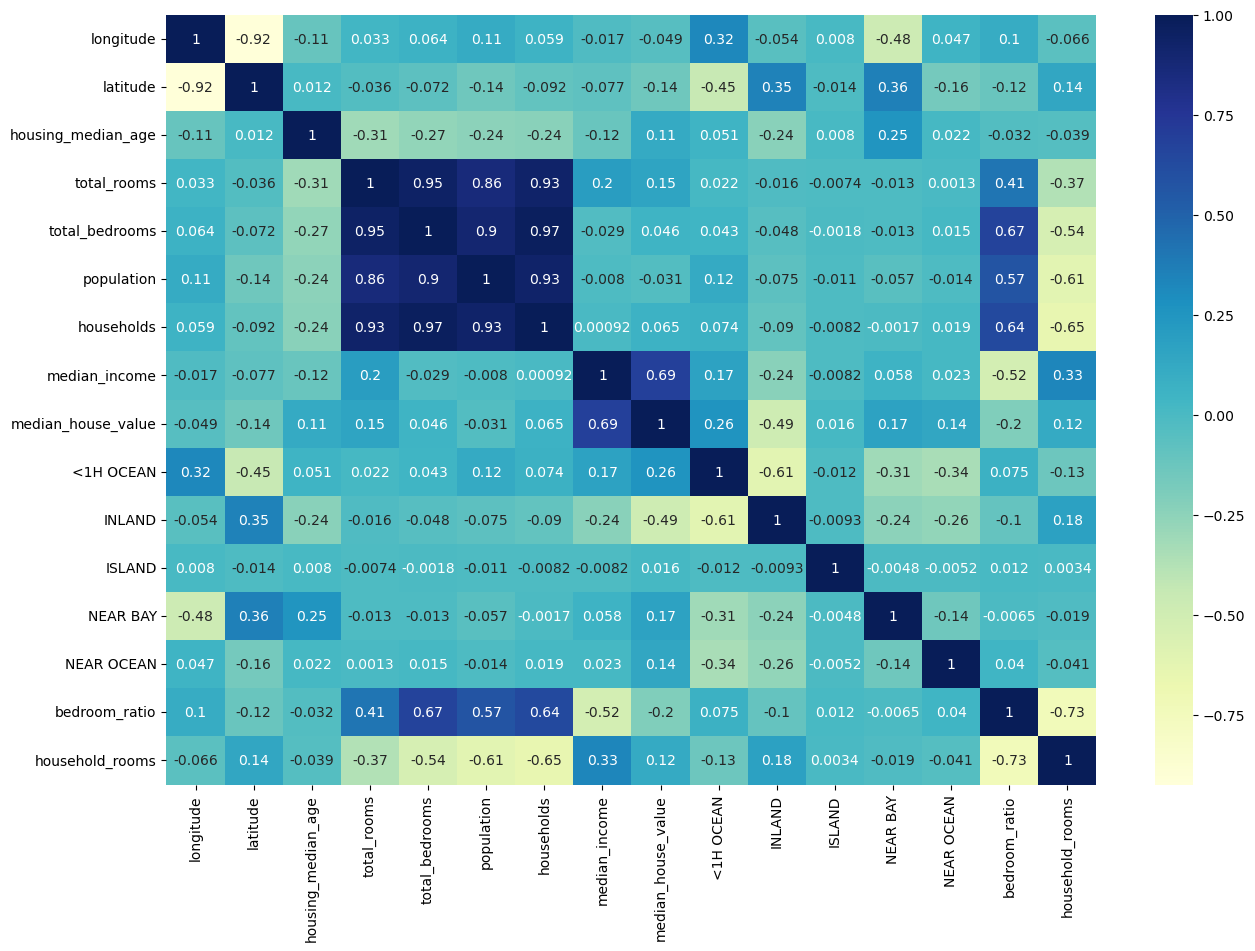

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [20]:
test_data = x_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [21]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [22]:
x_test_s = scaler.transform(x_test)

In [23]:
reg.score(x_test_s, y_test)

/Users/paulthomas/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-370.3524945956052

In [44]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)


RandomForestRegressor()

In [45]:
forest.score(x_test_s, y_test)

0.8194552996043613

In [ ]:
from sklearn.model_selection import GridSearchCV

forest =  RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split" : [2, 4],
    "max_depth" : [None, 4, 8] 
}

grid_search = GridSearchCV(forest, param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                          )
grid_search.fit(x_train_s, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)